# Frances Dai (fad4yr)
# KMC HW

## Q1

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./data/airbnb_hw.csv')

df['num_reviews'] = df['Number Of Reviews']
df['price'] = df['Price']
df['beds'] = df['Beds']
df['score'] = df['Review Scores Rating']

a = df.loc[:,['price','beds','num_reviews','score']]

print(a.shape)
a.describe()

(30478, 4)


,beds,num_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [16]:
# clean price
a['price'].value_counts()

price
150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: count, Length: 511, dtype: int64

In [17]:
a['price'] = a['price'].str.replace(',','') # taking out commas from values

a['price'] = pd.to_numeric(a['price'], errors = 'coerce') # convert to numeric
a.describe()

,price,beds,num_reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [18]:
# clean beds

a['beds'] = a['beds'].fillna(1) # fill NA values with 1
a.describe()

,price,beds,num_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [19]:
# clean review scores
pd.crosstab( df['score'].isnull() , df['num_reviews'] > 0) # see how many entires do not have a score / do not have any reviews

num_reviews,False,True
score,,
False,0,22155
True,7814,509


In [20]:
a = a.dropna() # drop na values - those w no reviews and no score and those with no reviews only
a.describe()

,price,beds,num_reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [21]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

x = a.drop('price', axis = 1)
x = x.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [22]:
from sklearn.cluster import KMeans

model = (KMeans( n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0)).fit(x)
x['cluster'] = model.labels_

In [23]:
x.describe()

,beds,num_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.149718
std,0.065205,0.094954,0.110630,1.401749
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

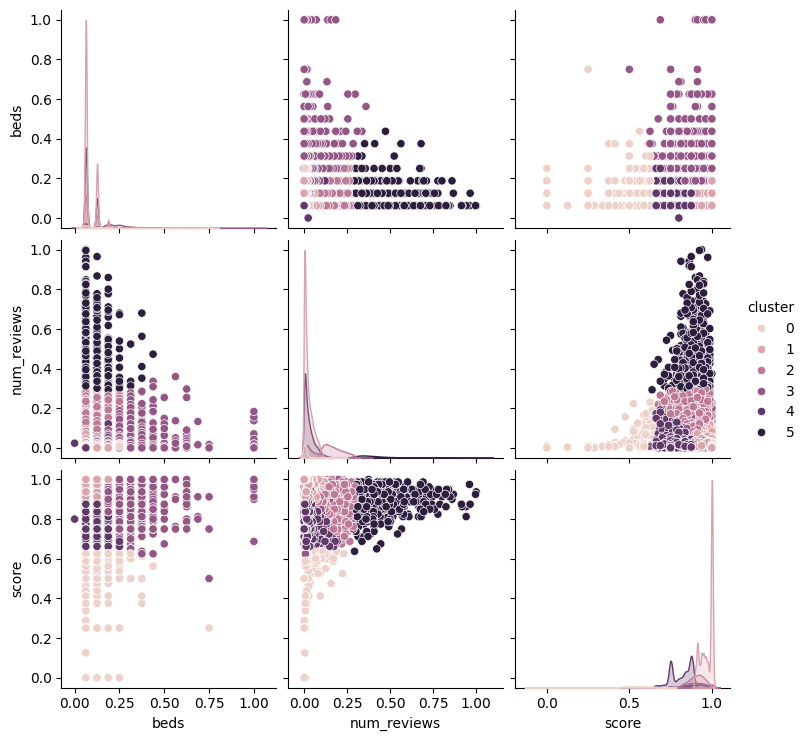

In [25]:
import seaborn as sns
sns.pairplot(data = x,hue ='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [26]:
a['cluster'] = model.labels_

a.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

The clusters with the highest rental prices is cluster 3 with an average of ~ $294/night, cluster 1 (~ $152/night) and cluster 2 at around $141/night. Cluster 3's high rental price is not due to outliers that skew the mean, it is more expensive than the other clusters across all quartiles. 

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

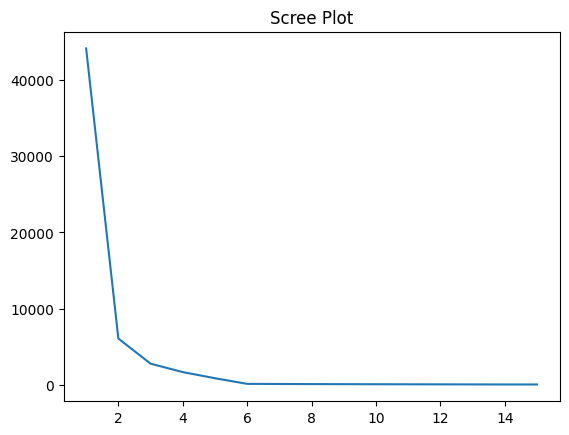

In [28]:
k_bar = 15

k_grid = np.arange(1,k_bar+1) # range to consider

SSE = np.zeros(k_bar) # training error

for k in range(k_bar): #for each k in the range
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(x) # create and fit model for k
    SSE[k] = model.inertia_ # record SSE for k

sns.lineplot(x = k_grid, y = SSE).set_title('Scree Plot') # Create scree plot


price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        11161.0  151.228743  151.963553  10.0  85.0  129.0  190.0  10000.0
1         6346.0  131.830602  100.510035  20.0  75.0  110.0  169.0   5000.0
2         4648.0  194.677065  184.430237  22.0  99.0  150.0  225.0   4500.0

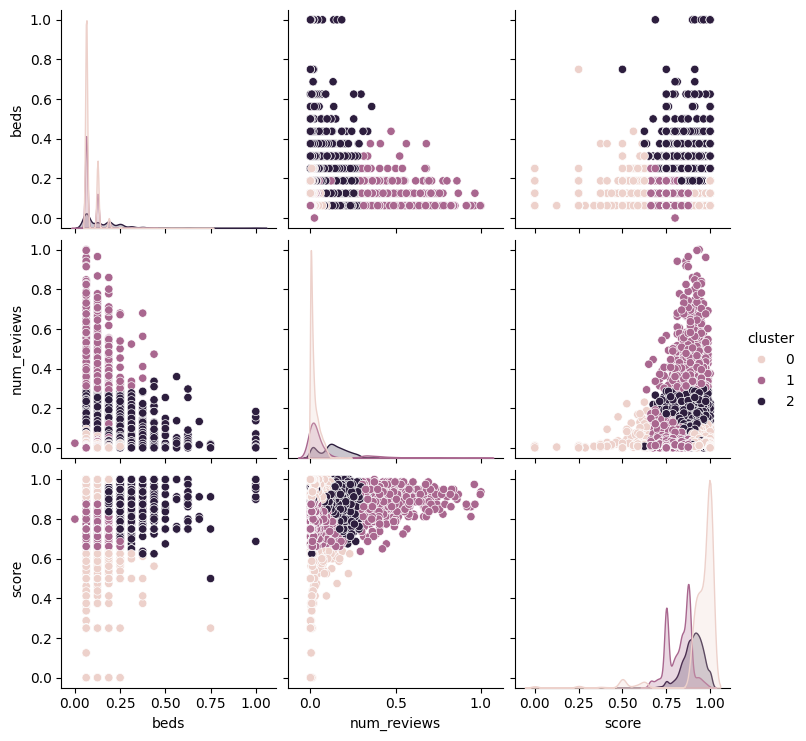

In [30]:
model = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0).fit(x)
x['cluster'] = model.labels_

sns.pairplot(data = x,hue ='cluster') # step 4

a['cluster'] = model.labels_

a.loc[:,['price','cluster'] ].groupby('cluster').describe() # step 5

Cluster 2 has the highest rental prices with an average of $195, followed by cluster 0 with $151 and cluster 1 with $132. Cluster 2 seems to have the highest average review, as most of its data clusters on the right side of the graph. Cluster Cluster 0 has a pretty high review score though they tend to have fewer reviews. Cluster 1 has a lot of variance in its review scores distribution and has the fewest reviews.

## Q2

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.
```

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    a1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    a2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    a3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':a1[0,:],'x2':a1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':a2[0,:],'x2':a2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':a3[0,:],'x2':a3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(a1,a2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

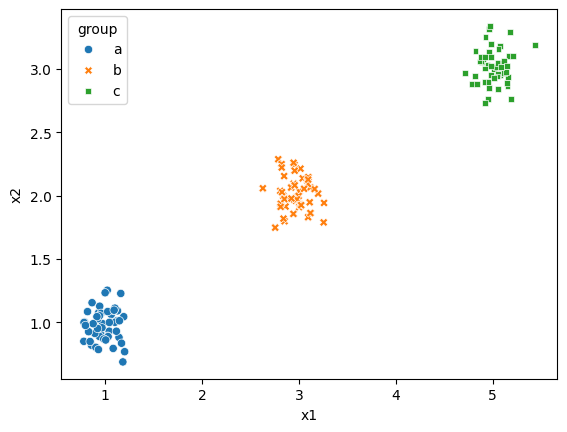

In [34]:
sns.scatterplot(data = df0_125, x = 'x1',y = 'x2',hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

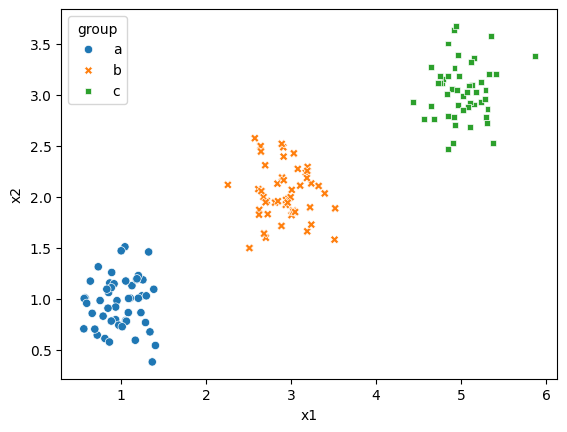

In [35]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

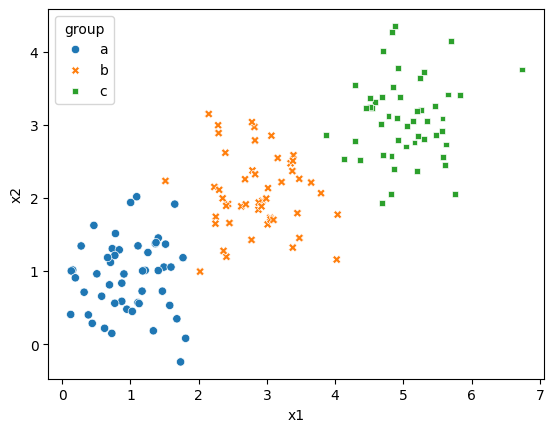

In [36]:
sns.scatterplot(data = df0_5, x = 'x1',y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

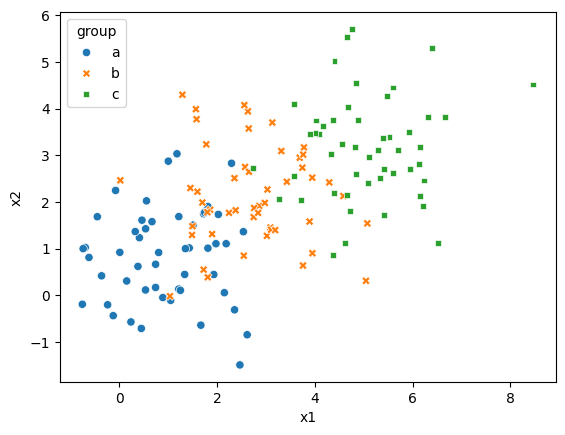

In [38]:
sns.scatterplot(data = df1_0, x = 'x1', y='x2', hue ='group', style ='group')

<Axes: xlabel='x1', ylabel='x2'>

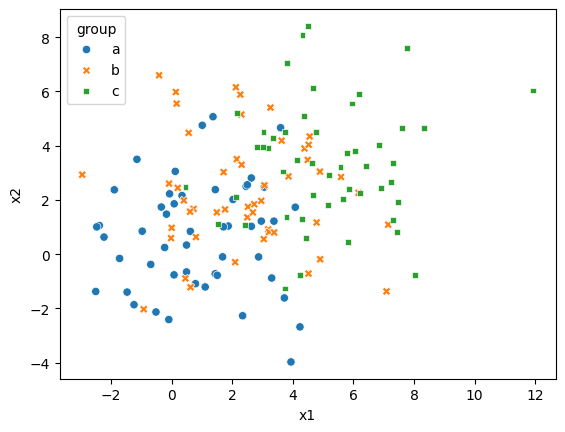

In [39]:
sns.scatterplot(data = df2_0, x = 'x1', y ='x2', hue ='group', style ='group')

As the noise goes up from 0.125 to 2.0, the visual distinctness of the clusters decreases. The clusters disperse and overlap with each other until they are all mixed together in nosie = 2.0 compared to noise 0.125 where there were very clear distinctions of cluster groups and they were far away from each other. After noise = 0.5, the clusters overlap a significant amount and it is hard to distinguish them.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

In [40]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data):

    a = data.loc[ :, ['x1','x2']] 
    a = a.apply(maxmin)

    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(a)
        SSE[k] = model.inertia_

    scree_plot, axes = plt.subplots()
    sns.lineplot(x = k_grid, y = SSE).set_title('Scree plot')
    axes.set_ylim(0, 35)

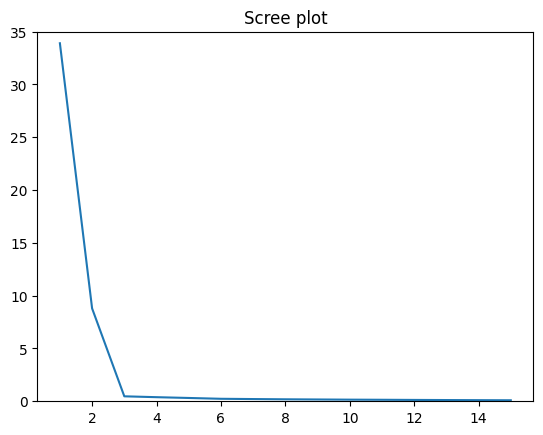

In [41]:
scree(data = df0_125)

Prominent elbow at k = 3 for noise level 0.125

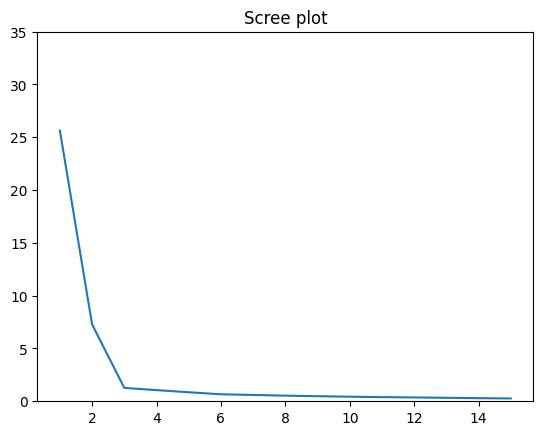

In [43]:
scree(data = df0_25)

Also a promient elbow at k=3 for noise of 0.25

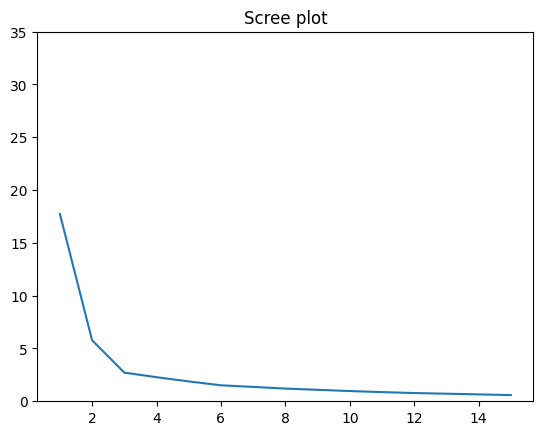

In [44]:
scree(data = df0_5)

Smaller but still obvious elbow at k=3 for noise level 0.5

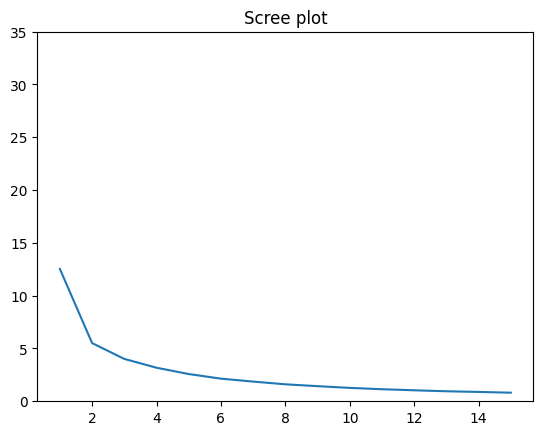

In [45]:
scree(data = df1_0)

No obvious elbow anymore for noise level 1, maybe a small one around k = 2 or 3.

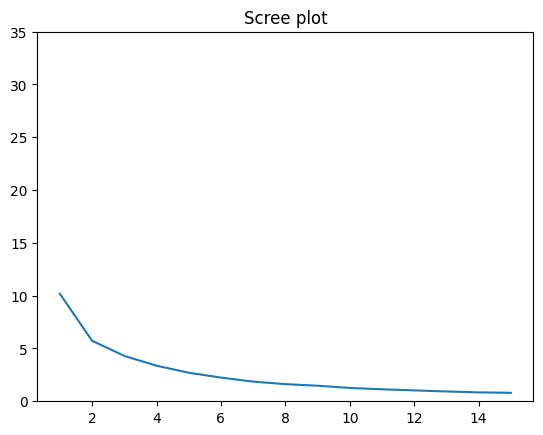

In [46]:
scree(data = df2_0 )

No obvious presense of elbow for noise level 2

4. Explain the intuition of the elbow, using this numerical simulation as an example.

> If the groups are separated and distinct, the marginal benefit of an additional cluster is large since you capture a big drop in SSE. As the noise goes up, the groups spread out, and eventually they are visually indistinct. Even though we know that points to the upper right are probably from cluster c and points to the bottom left are probably from cluster a, the significant overlap among groups means it's no longer clear how many groups to pick or which points belong to each. In this case, the clustering may or may not be stable, and isn't really uncovering hidden heterogeneity. So, if there are clusters that are separated and visually distinct, the scree plot approach will work and there will be a distinct elbow; if it's just a cloud of points, the scree plot will be smooth, and the elbow will be indistinct.

The elbow is the spot where the reduction in SSE from k - 1 to k drops signifcantly compared to when going from k to k + 1. This signifies that there is only a marginal benefit of adding clusters therefore increasing k does not further improve the fit. If there is no elbow, there may not be discrete groups. As noise level increases, the groups become less and less distinct and overlap. The groups for noise of 0.125 are very distinct while noise of 2 the groups are all overlapped over each other, thus it is not clear what k to pick or what points are in which group. So, if the clusters are distinct, the scree plot will show a distinct elbow. Otherwise, there will be no distinct elbow. We can see this as the noise levels increase, the elbow becomes less and less noticeable because the groups become less and less distinct.  